# 資工二 109590011 陳彥宇 資料科學導論 Lab6

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pathlib

filePath = f'{pathlib.Path().resolve()}/data.csv'
data = pd.read_csv(filePath)

data['openingPrice'] = data['openingPrice'].replace({
    '\$': '',
    ',': '',
    '--': np.nan,
}, regex=True)
data.dropna()
data['openingPrice'] = data['openingPrice'].astype(float)
data['closingPrice'] = data['closingPrice'].replace({
    '\$': '',
    ',': '',
    '--': np.nan,
}, regex=True)
data.dropna()
data['closingPrice'] = data['closingPrice'].astype(float)
data['date'] = pd.to_datetime(data['date'])
data = data.set_index('date')
data = data.groupby('name')

## 開盤價平均值與圖表

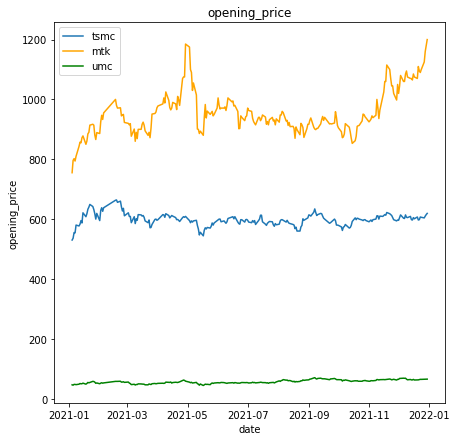

台積電開盤價平均值: 598.2090163934427
聯發科開盤價平均值: 953.639344262295
聯電開盤價平均值: 56.58381147540984


In [110]:
tsmc = data.get_group('台積電')
tsmcOpeningPrice = tsmc['openingPrice']

mtk = data.get_group('聯發科')
mtkOpeningPrice = mtk['openingPrice']

umc = data.get_group('聯電')
umcOpeningPrice = umc['openingPrice']

plt.figure(figsize=(7, 7))
plt.title('opening_price')
plt.plot(tsmcOpeningPrice, label='tsmc')
plt.plot(mtkOpeningPrice, label='mtk', color = 'orange')
plt.plot(umcOpeningPrice, label='umc', color = 'green')
plt.xlabel('date')
plt.ylabel('opening_price')
plt.legend()
plt.show()

print(f'台積電開盤價平均值: {tsmcOpeningPrice.mean()}')
print(f'聯發科開盤價平均值: {mtkOpeningPrice.mean()}')
print(f'聯電開盤價平均值: {umcOpeningPrice.mean()}')


## 收盤價平均值與圖表

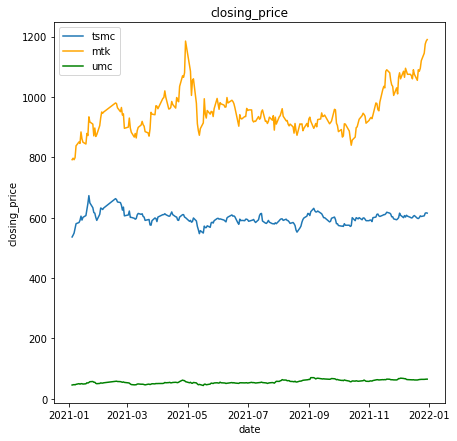

台積電收盤價平均值: 597.733606557377
聯發科收盤價平均值: 951.5696721311475
聯電收盤價平均值: 56.42479508196722


In [111]:
tsmcClosingPrice = tsmc['closingPrice']
mtkClosingPrice = mtk['closingPrice']
umcClosingPrice = umc['closingPrice']

plt.figure(figsize=(7, 7))
plt.title('closing_price')
plt.plot(tsmcClosingPrice, label='tsmc')
plt.plot(mtkClosingPrice, label='mtk', color = 'orange')
plt.plot(umcClosingPrice, label='umc', color = 'green')
plt.xlabel('date')
plt.ylabel('closing_price')
plt.legend()
plt.show()

print(f'台積電收盤價平均值: {tsmcClosingPrice.mean()}')
print(f'聯發科收盤價平均值: {mtkClosingPrice.mean()}')
print(f'聯電收盤價平均值: {umcClosingPrice.mean()}')

## 與台積電絕對值相關度排行第10名的股票

In [112]:
def getCorr(name):
    tsmc = data.get_group('台積電').reset_index(drop = True)
    target = data.get_group(name).reset_index(drop = True)
    return tsmc['closingPrice'].corr(target['closingPrice'])

result = pd.DataFrame()
result['name'] = data.groups.keys()
result['corr'] = result['name'].apply(getCorr)
result['corr'] = result['corr'].abs()
result = result.sort_values(by='corr', ascending=False)
result = result.reset_index(drop = True)
print(f'與台積電絕對值相關度排行第10名的股票是 {result["name"][9]}')

與台積電絕對值相關度排行第10名的股票是 國泰AI+Robo


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
